In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Bruteforce004/Cleaned-data-of-Indian-Forests/main/Tree_cover_loss_Urbanisation.csv")
df1=pd.read_csv("https://raw.githubusercontent.com/Bruteforce004/Cleaned-data-of-Indian-Forests/main/Tree_cover_loss_Shifting_agri.csv")
df2=pd.read_csv("https://raw.githubusercontent.com/Bruteforce004/Cleaned-data-of-Indian-Forests/main/Tree_cover_loss_Shifting_agri.csv")

In [3]:
a=pd.concat([df,df1,df2],axis=1)

In [5]:
a.head()

,Unnamed: 0,tsc_tree_cover_loss_drivers__type,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,Unnamed: 0,tsc_tree_cover_loss_drivers__type,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,Unnamed: 0,tsc_tree_cover_loss_drivers__type,umd_tree_cover_loss__year,umd_tree_cover_loss__ha
0,0,Urbanization,2001,95.197462,0,Shifting agriculture,2001,7110.184005,0,Shifting agriculture,2001,7110.184005
1,1,Urbanization,2002,65.719179,1,Shifting agriculture,2002,7528.989108,1,Shifting agriculture,2002,7528.989108
2,2,Urbanization,2003,38.388491,2,Shifting agriculture,2003,6974.420396,2,Shifting agriculture,2003,6974.420396
3,3,Urbanization,2004,64.675238,3,Shifting agriculture,2004,10657.994010,3,Shifting agriculture,2004,10657.994010
4,4,Urbanization,2005,77.171413,4,Shifting agriculture,2005,9473.534674,4,Shifting agriculture,2005,9473.534674


In [6]:
a.columns.values[2] = "Year"
a.columns.values[3] = "Urbanization"
a.columns.values[7] = "Wildfire"
a.columns.values[11] = "Shifting_agriculture"

In [7]:
a.head()

,Unnamed: 0,tsc_tree_cover_loss_drivers__type,Year,Urbanization,Unnamed: 0,tsc_tree_cover_loss_drivers__type,umd_tree_cover_loss__year,Wildfire,Unnamed: 0,tsc_tree_cover_loss_drivers__type,umd_tree_cover_loss__year,Shifting_agriculture
0,0,Urbanization,2001,95.197462,0,Shifting agriculture,2001,7110.184005,0,Shifting agriculture,2001,7110.184005
1,1,Urbanization,2002,65.719179,1,Shifting agriculture,2002,7528.989108,1,Shifting agriculture,2002,7528.989108
2,2,Urbanization,2003,38.388491,2,Shifting agriculture,2003,6974.420396,2,Shifting agriculture,2003,6974.420396
3,3,Urbanization,2004,64.675238,3,Shifting agriculture,2004,10657.994010,3,Shifting agriculture,2004,10657.994010
4,4,Urbanization,2005,77.171413,4,Shifting agriculture,2005,9473.534674,4,Shifting agriculture,2005,9473.534674


In [8]:
df=a[['Year','Urbanization','Wildfire','Shifting_agriculture']]
df=df.round(2)
df=df.tail(10)

In [9]:
df.head()

,Year,Urbanization,Wildfire,Shifting_agriculture
10,2011,182.14,20159.78,20159.78
11,2012,194.17,14360.32,14360.32
12,2013,110.76,7431.79,7431.79
13,2014,221.61,14271.25,14271.25
14,2015,84.13,7891.90,7891.90


In [10]:
df.corr()

,Year,Urbanization,Wildfire,Shifting_agriculture
Year,1.000000,-0.093931,0.364091,0.364091
Urbanization,-0.093931,1.000000,0.488194,0.488194
Wildfire,0.364091,0.488194,1.000000,1.000000
Shifting_agriculture,0.364091,0.488194,1.000000,1.000000


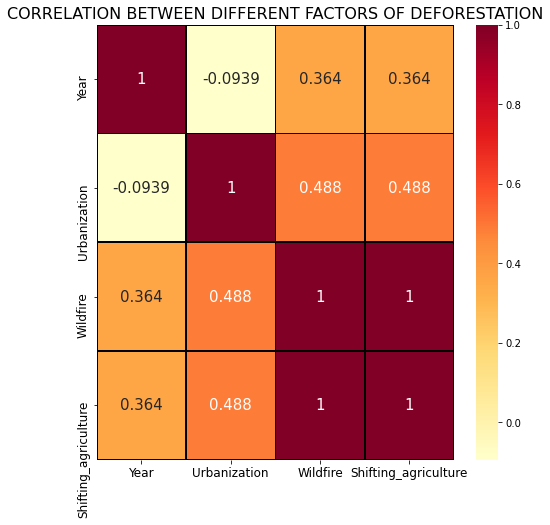

In [11]:
import seaborn
plt.figure(figsize = (8,8))
seaborn.heatmap(df.corr(), annot = True,fmt= '0.3g', cmap = 'YlOrRd',linewidth=0.7,linecolor='black',annot_kws={"size":15})

plt.title("CORRELATION BETWEEN DIFFERENT FACTORS OF DEFORESTATION", fontsize=16)
plt.xticks( fontsize = 12)
plt.yticks( fontsize=12)
plt.savefig('deforestation_factors_heatmap.png', transparent=False, bbox_inches='tight', pad_inches=0, dpi=1200)

plt.show()
plt.close()

*Interpretation:Correlation is a degree of association between two variables ranging from -1 to +1.Correlation matrix is a table showing the correlation coefficients of variables in a correlational study.  
_Posititve correlation_:As one variable increases, so does the other i.e. both variables moving in the same direction.  
_Negative correlation_: If one variable increases, the other decreases i.e. variables move in opposite direction.  
If the correlation coefficient is 1, it is said to be a perfect relation however if the coefficient is 0,it means no relation between the two variables in observed.  
Year and urbanization are negatively correlated with a very weak degree of association(-0.093).Furthermore, all the remaining variables have a weak colinear-relationship ranging from 0.20 to 0.40 corelation coefficients.  
Since, the degree of association between these factors is quite low, there seems almost no corelation between them.*

In [12]:
df

,Year,Urbanization,Wildfire,Shifting_agriculture
10,2011,182.14,20159.78,20159.78
11,2012,194.17,14360.32,14360.32
12,2013,110.76,7431.79,7431.79
13,2014,221.61,14271.25,14271.25
14,2015,84.13,7891.90,7891.90
15,2016,216.49,13380.49,13380.49
16,2017,186.74,22952.78,22952.78
17,2018,158.28,17010.50,17010.50
18,2019,135.02,18877.68,18877.68
19,2020,173.26,19060.08,19060.08


In [13]:
df["Urbanization"]=(df['Urbanization']/df.Urbanization.sum())*100
df["Wildfire"]=(df['Wildfire']/df.Wildfire.sum())*100
df["Shifting_agriculture"]=(df['Shifting_agriculture']/df.Shifting_agriculture.sum())*100

In [14]:
df.head()

,Year,Urbanization,Wildfire,Shifting_agriculture
10,2011,10.955131,12.973118,12.973118
11,2012,11.678696,9.241079,9.241079
12,2013,6.661855,4.782467,4.782467
13,2014,13.329123,9.183761,9.183761
14,2015,5.060147,5.078555,5.078555


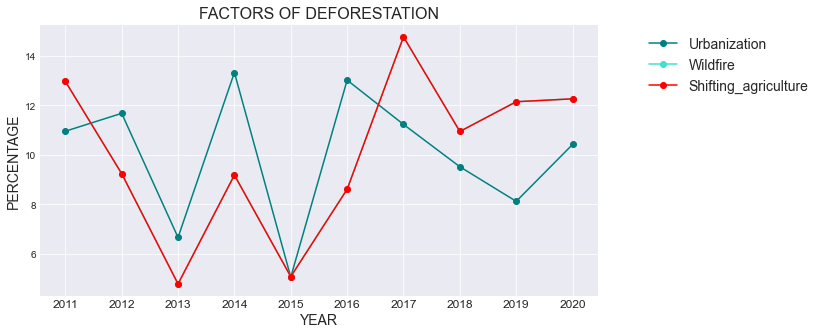

In [15]:
import numpy as np
x = df['Year']
y1 = df['Urbanization']
y2 = df['Wildfire']
y3 = df['Shifting_agriculture']

plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(10,5))
plt.plot( x, y1, marker='o', markerfacecolor='teal', color='teal',label='Urbanization')
plt.plot( x, y2, marker='o', markerfacecolor='turquoise', color='turquoise',label='Wildfire')
plt.plot( x, y3, marker='o', markerfacecolor='red', color='red', label='Shifting_agriculture')

plt.title('FACTORS OF DEFORESTATION', fontsize = 16)
plt.xlabel('YEAR',fontsize = 14)
plt.xticks(x,fontsize = 12)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.ylabel('PERCENTAGE',fontsize = 14)
plt.legend(bbox_to_anchor=(1.4, 1), fancybox=True, fontsize= 14)

plt.savefig('Factors_of_deforestation_multiple_line.png', transparent=False, bbox_inches='tight', pad_inches=0, dpi=2000)
plt.show()
plt.close()

*Interpretation:Wildfires caused the most tree cover loss across the country with a peak in 2017, contributing to an average loss of 25% in the decade. Urbanization and increased need of agricultural land almost show similar trend pattern in their contribution towards deforestation.*  
    